## Final Project - House Price Prediction of King county 

In [11]:
# load libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.neighbors import KNeighborsRegressor , KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor , DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn import metrics
from sklearn.feature_selection import RFE,SelectKBest,f_regression
import warnings
warnings.filterwarnings('ignore')

## Data Collection

In [12]:
# Read Dataset
kc_data = pd.read_csv('kc_house_data.csv')

In [13]:
kc_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## Data Preprocessing

In [14]:
# (noise) Change the date format to just the year 
kc_data['date'] = kc_data['date'].str.slice(0,4)

In [15]:
kc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


In [16]:
# (missing data) The dataset contains No Null Values with 5-float,15-int and 1-Object(string) features.

In [17]:
# (creating dummy variable) Change categorical data to numerical data 
kc_data = pd.get_dummies(kc_data,drop_first=True)

In [18]:
kc_data.shape

(21613, 21)

## Data Exploration

In [19]:
# Price Statistics
kc_data['price'].describe()

count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

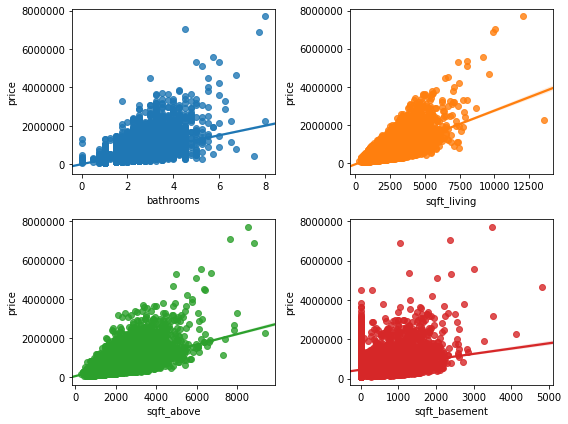

In [20]:
# Comparing price with numerical features
fig, axs = plt.subplots(ncols=2,nrows=2,figsize=(8,6))
sns.regplot(kc_data['bathrooms'],kc_data['price'],ax=axs[0,0])
sns.regplot(kc_data['sqft_living'],kc_data['price'],ax=axs[0,1])
sns.regplot(kc_data['sqft_above'],kc_data['price'],ax=axs[1,0])
sns.regplot(kc_data['sqft_basement'],kc_data['price'],ax=axs[1,1])
plt.tight_layout()

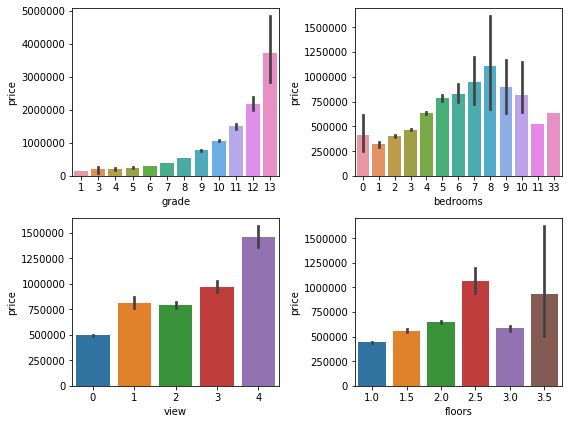

In [21]:
# Comparing price with categorical features
fig, axs = plt.subplots(ncols=2,nrows=2,figsize=(8,6))
sns.barplot(kc_data['grade'],kc_data['price'],ax=axs[0,0])
sns.barplot(kc_data['bedrooms'],kc_data['price'],ax=axs[0,1])
sns.barplot(kc_data['view'],kc_data['price'],ax=axs[1,0])
sns.barplot(kc_data['floors'],kc_data['price'],ax=axs[1,1])
plt.tight_layout()

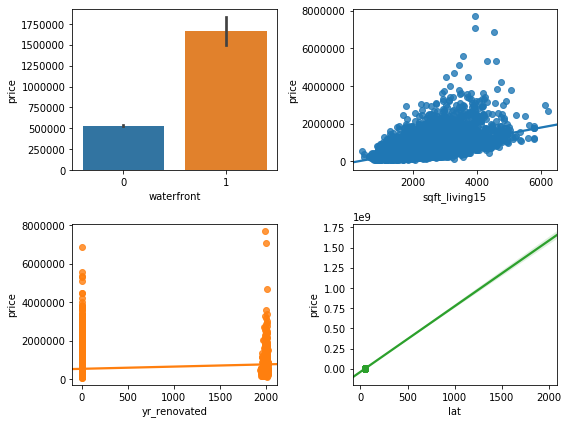

In [22]:
# Comparing price with other important features
fig, axs = plt.subplots(ncols=2,nrows=2,figsize=(8,6))
sns.barplot(kc_data['waterfront'],kc_data['price'],ax=axs[0,0])
sns.regplot(kc_data['sqft_living15'],kc_data['price'],ax=axs[0,1])
sns.regplot(kc_data['yr_renovated'],kc_data['price'],ax=axs[1,0])
sns.regplot(kc_data['lat'],kc_data['price'],ax=axs[1,1])
plt.tight_layout()

#### Removing Outlier (found during EDA)

In [23]:
kc_data[kc_data['bedrooms']==33]

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date_2015
15870,2402100895,640000.0,33,1.75,1620,6000,1.0,0,0,5,...,1040,580,1947,0,98103,47.6878,-122.331,1330,4700,0


In [24]:
kc_data.drop(15870,inplace=True)

In [25]:
kc_features_data =  kc_data.iloc[:,2::]

### Using Select K Best - Feature Selection

In [26]:
selector = SelectKBest(f_regression,k='all').fit(kc_features_data,kc_data['price'])
print('----------------------Feature Scores-------------------------')
print(selector.scores_)
print("-----------------Feature Scores' P-values--------------------")
print(selector.pvalues_)

----------------------Feature Scores-------------------------
[2.38792459e+03 8.22897741e+03 2.10023042e+04 1.75144105e+02
 1.52585113e+03 1.65040802e+03 4.05040206e+03 2.85696576e+01
 1.73610520e+04 1.25150392e+04 2.53131111e+03 6.32524672e+01
 3.51075477e+02 6.13561555e+01 2.24862897e+03 1.01217607e+01
 1.12668362e+04 1.47914597e+02 2.77706642e-01]
-----------------Feature Scores' P-values--------------------
[0.00000000e+000 0.00000000e+000 0.00000000e+000 7.95753908e-040
 1.48219694e-322 0.00000000e+000 0.00000000e+000 9.13037752e-008
 0.00000000e+000 0.00000000e+000 0.00000000e+000 1.90713406e-015
 1.02109197e-077 4.98161365e-015 0.00000000e+000 1.46736107e-003
 0.00000000e+000 6.39294519e-034 5.98213729e-001]


In [27]:
feature_scores = list(selector.scores_)
kc_features_data.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date_2015
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,0
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,0
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,1
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,0
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,1


In [28]:
# features with corresponding scores
feature_names = list(kc_features_data.columns.values)
feature_score_dict = dict(zip(feature_names,feature_scores))
feature_score_dict

{'bedrooms': 2387.9245920333806,
 'bathrooms': 8228.977408041797,
 'sqft_living': 21002.304161979228,
 'sqft_lot': 175.14410514581112,
 'floors': 1525.8511320891844,
 'waterfront': 1650.4080187000768,
 'view': 4050.402063130254,
 'condition': 28.569657602904442,
 'grade': 17361.05198133765,
 'sqft_above': 12515.039203719882,
 'sqft_basement': 2531.3111052778845,
 'yr_built': 63.252467228971014,
 'yr_renovated': 351.0754774238385,
 'zipcode': 61.35615545226101,
 'lat': 2248.6289720518616,
 'long': 10.121760712055881,
 'sqft_living15': 11266.83617592883,
 'sqft_lot15': 147.91459734591243,
 'date_2015': 0.27770664203842776}

In [29]:
# Using Standard Scaler
scaler = StandardScaler()

#### Train, Test and Validation sets

In [30]:
# Train and Test Set
x_train,x_test,y_train,y_test = train_test_split(kc_features_data,kc_data['price'],test_size=0.3, random_state = 0)

In [31]:
# Train and Validataion Set
x_train,x_val,y_train,y_val = train_test_split(x_train,y_train,test_size=0.25,random_state=0)

### Scaling Data

In [32]:
scaled_x_train = scaler.fit_transform(x_train)
scaled_x_val = scaler.transform(x_val)
scaled_x_test = scaler.transform(x_test)

# Regression Models

#### Ridge Regression using all features

In [33]:
model = Ridge(alpha = 1).fit(X=scaled_x_train,y =y_train)
print(model.coef_)
print(model.intercept_)

[-31280.81795927  31702.00883315  76276.42856332   9683.79880041
   4235.9649007   41121.40020234  44296.11224133  17828.81449154
 118893.96791186  72282.24285923  23384.27604742 -76433.47749067
   6662.56516818 -31285.45197727  86285.90246499 -31031.47766046
  14509.18793544 -13477.71697338  15841.33869649]
538807.9664198802


In [34]:
score_train = model.score(X=scaled_x_train,y=y_train) # R squared (training)
score_val =model.score(X=scaled_x_val,y=y_val) # R squared (validation)
score_test = model.score(X =scaled_x_test, y = y_test) # R squared (test)
adj_r_squared = 1-(((1-score_val)*(len(x_val)-1))/(len(x_val)-x_val.shape[1]-1)) #adjusted R squared(validation)
print([score_train, score_val, score_test])
print(adj_r_squared)

[0.6996290899404481, 0.7187317388523007, 0.6929334347955567]
0.7173111920788274


#### Lasso Regression using all features

In [35]:
model = Lasso(alpha = 1,random_state=0).fit(X=scaled_x_train,y =y_train)
print(model.coef_)
print(model.intercept_)

[-31289.54632804  31697.79323667 253778.55641706   9682.27070882
   4232.61220164  41123.50953083  44296.51779865  17825.19290496
 118918.07953281 -87516.81627851 -61585.81718966 -76449.1733656
   6657.76210594 -31293.88296766  86290.4750918  -31031.26442046
  14485.17047851 -13478.92660311  15842.13590976]
538807.9664198802


In [36]:
score_train = model.score(X=scaled_x_train,y=y_train) # R squared (training)
score_val =model.score(X=scaled_x_val,y=y_val) # R squared (validation)
score_test = model.score(X =scaled_x_test, y = y_test) # R squared (test)
adj_r_squared = 1-(((1-score_val)*(len(x_val)-1))/(len(x_val)-x_val.shape[1]-1)) #adjusted R squared(validation)
print([score_train, score_val, score_test])
print(adj_r_squared)

[0.6996290938003702, 0.71873083153697, 0.692936296474021]
0.7173102801810962


#### ElasticNet  using all features

In [37]:
model = ElasticNet(alpha = 1, l1_ratio = 0.5).fit(X=scaled_x_train,y =y_train)
print(model.coef_)
print(model.intercept_)

[ -4534.60755585  28340.66130067  57746.21335836   4918.5744192
   9821.8630233   30689.46558435  40379.86055044  16841.60322015
  72337.39719656  51310.80553586  24118.88512266 -35764.85352089
  12176.84775305  -6538.91993591  60908.27327012 -19333.99646958
  38434.65689743  -3171.53441616   9024.40938652]
538807.9664198823


In [38]:
score_train = model.score(X=scaled_x_train,y=y_train) # R squared (training)
score_val =model.score(X=scaled_x_val,y=y_val) # R squared (validation)
score_test = model.score(X =scaled_x_test, y = y_test) # R squared (test)
adj_r_squared = 1-(((1-score_val)*(len(x_val)-1))/(len(x_val)-x_val.shape[1]-1)) #adjusted R squared(validation)
print([score_train, score_val, score_test])
print(adj_r_squared)

[0.6660936352637814, 0.6848553460218129, 0.6528109887395909]
0.6832637063552565


#### Decision Tree Regressor  using all features

In [39]:
model = DecisionTreeRegressor(random_state=0).fit(scaled_x_train,y_train)
score_train = model.score(X=scaled_x_train,y=y_train) # R squared (training)
score_val =model.score(X=scaled_x_val,y=y_val) # R squared (validation)
score_test = model.score(X =scaled_x_test, y = y_test) # R squared (test)
adj_r_squared = 1-(((1-score_val)*(len(x_val)-1))/(len(x_val)-x_val.shape[1]-1)) #adjusted R squared(validation)
print([score_train, score_val, score_test])
print(adj_r_squared)

[0.9999094048370556, 0.7679809944814076, 0.7706398331287826]
0.7668091813222228


#### KNN Regressor using all features

In [40]:
model = KNeighborsRegressor(n_neighbors=5).fit(X=scaled_x_train,y =y_train)
score_train = model.score(X=scaled_x_train,y=y_train) # R squared (training)
score_val =model.score(X=scaled_x_val,y=y_val) # R squared (validation)
score_test = model.score(X =scaled_x_test, y = y_test) # R squared (test)
adj_r_squared = 1-(((1-score_val)*(len(x_val)-1))/(len(x_val)-x_val.shape[1]-1)) #adjusted R squared(validation)
print([score_train, score_val, score_test])
print(adj_r_squared)

[0.8417315949604249, 0.7898535226855233, 0.7725373951667546]
0.7887921768405007


#### Multiple Linear Regressor using all features

In [41]:
model = LinearRegression().fit(scaled_x_train,y_train)
score_train = model.score(X=scaled_x_train,y=y_train) # R squared (training)
score_val =model.score(X=scaled_x_val,y=y_val) # R squared (validation)
score_test = model.score(X =scaled_x_test, y = y_test) # R squared (test)
adj_r_squared = 1-(((1-score_val)*(len(x_val)-1))/(len(x_val)-x_val.shape[1]-1)) #adjusted R squared(validation)
print([score_train, score_val, score_test])
print(adj_r_squared)

[0.6996290941426098, 0.7187306337255207, 0.6929359697389114]
0.717310081370599


#### Random Forrest Regressor using all features

In [42]:
model = RandomForestRegressor(random_state=0).fit(scaled_x_train,y_train) 
score_train = model.score(X=scaled_x_train,y=y_train) # R squared (training)
score_val = model.score(X=scaled_x_val,y=y_val) # R squared (validation)
score_test = model.score(X =scaled_x_test, y = y_test) # R squared (test)
adj_r_squared = 1-(((1-score_val)*(len(x_val)-1))/(len(x_val)-x_val.shape[1]-1)) #adjusted R squared(validation)
print([score_train, score_val, score_test])
print(adj_r_squared)

[0.9701567579133075, 0.8747295712047556, 0.8620238038642775]
0.8740968922714463


In [43]:
# List of Important Features
imp_features = ['bedrooms',
 'bathrooms',
 'sqft_living',
 'floors',
 'waterfront',
 'view',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_renovated',
 'lat',
 'sqft_living15']

In [44]:
# Dataset with important features
x_train = x_train[imp_features]
x_val = x_val[imp_features]
x_test = x_test[imp_features]

In [45]:
# Scaling Important Feature Dataset
scaled_x_train = scaler.fit_transform(x_train)
scaled_x_val = scaler.transform(x_val)
scaled_x_test = scaler.transform(x_test)

#### Ridge Regression using Important features

In [46]:
model = Ridge(alpha = 1).fit(X=scaled_x_train,y =y_train)
print(model.coef_)
print(model.intercept_)

[-21908.15876793  -4341.26717426  84088.11933631 -15344.75451501
  40585.18239111  53978.43193891 104145.59110049  73612.81022478
  37199.07657463  21406.32531403  93501.26530863   4604.33644554]
538807.966419882


In [47]:
score_train = model.score(X=scaled_x_train,y=y_train) # R squared (training)
score_val =model.score(X=scaled_x_val,y=y_val) # R squared (validation)
score_test = model.score(X =scaled_x_test, y = y_test) # R squared (test)
adj_r_squared = 1-(((1-score_val)*(len(x_val)-1))/(len(x_val)-x_val.shape[1]-1)) #adjusted R squared(validation)
print([score_train, score_val, score_test])
print(adj_r_squared)

[0.6580630909744568, 0.6836444387263839, 0.653666585768011]
0.6826372042516471


#### Lasso Regression using Important features

In [48]:
model = Lasso(alpha=10,random_state=0).fit(X=scaled_x_train,y =y_train)
model.coef_

array([-21913.965385  ,  -4369.31651333, 232582.54498758, -15326.84554603,
        40579.42485187,  53978.9532339 , 104170.34291362, -60027.06075497,
       -33849.13815948,  21395.79212208,  93495.40846978,   4537.1784843 ])

In [49]:
score_train = model.score(X=scaled_x_train,y=y_train) # R squared (training)
score_val = model.score(X=scaled_x_val,y=y_val) # R squared (validation)
score_test = model.score(X =scaled_x_test, y = y_test) # R squared (test)
adj_r_squared = 1-(((1-score_val)*(len(x_val)-1))/(len(x_val)-x_val.shape[1]-1)) #adjusted R squared(validation)
print([score_train, score_val, score_test])
print(adj_r_squared)

[0.6580630800394413, 0.683640999182128, 0.6536720919606233]
0.6826337537563347


#### ElasticNet  using Important features

In [50]:
model = ElasticNet(alpha = 1, l1_ratio = 0.5).fit(X=scaled_x_train,y =y_train)
print(model.coef_)
print(model.intercept_)

[-2663.47360789 18818.58192195 57407.11170404  1370.7691168
 31297.03215622 44737.32360308 66943.78974041 47586.19148067
 30415.23400517 16880.873587   64642.69036949 33756.77922013]
538807.9664198825


In [51]:
score_train = model.score(X=scaled_x_train,y=y_train) # R squared (training)
score_val = model.score(X=scaled_x_val,y=y_val) # R squared (validation)
score_test = model.score(X =scaled_x_test, y = y_test) # R squared (test)
adj_r_squared = 1-(((1-score_val)*(len(x_val)-1))/(len(x_val)-x_val.shape[1]-1)) #adjusted R squared(validation)
print([score_train, score_val, score_test])
print(adj_r_squared)

[0.6320709061022907, 0.6541556803876882, 0.6206226725909685]
0.6530545575871184


#### Decision Tree Regressor using Important features

In [52]:
model = DecisionTreeRegressor(random_state=0).fit(scaled_x_train,y_train)
score_train = model.score(X=scaled_x_train,y=y_train) # R squared (training)
score_val = model.score(X=scaled_x_val,y=y_val) # R squared (validation)
score_test = model.score(X =scaled_x_test, y = y_test) # R squared (test)
adj_r_squared = 1-(((1-score_val)*(len(x_val)-1))/(len(x_val)-x_val.shape[1]-1)) #adjusted R squared(validation)
print([score_train, score_val, score_test])
print(adj_r_squared)

[0.9993841300058871, 0.6023396600684414, 0.6195867930647317]
0.6010735618781579


#### KNN Regressor  using Important features

In [53]:
model = KNeighborsRegressor(n_neighbors=5).fit(X=scaled_x_train,y =y_train)
score_train = model.score(X=scaled_x_train,y=y_train) # R squared (training)
score_val = model.score(X=scaled_x_val,y=y_val) # R squared (validation)
score_test = model.score(X =scaled_x_test, y = y_test) # R squared (test)
adj_r_squared = 1-(((1-score_val)*(len(x_val)-1))/(len(x_val)-x_val.shape[1]-1)) #adjusted R squared(validation)
print([score_train, score_val, score_test])
print(adj_r_squared)

[0.811655569838343, 0.7648410447043974, 0.734203076978137]
0.7640923295376298


#### Multiple Linear Regressor using Important features

In [54]:
model = LinearRegression().fit(scaled_x_train,y_train)
score_train = model.score(X=scaled_x_train,y=y_train) # R squared (training)
score_val = model.score(X=scaled_x_val,y=y_val) # R squared (validation)
score_test = model.score(X =scaled_x_test, y = y_test) # R squared (test)
adj_r_squared = 1-(((1-score_val)*(len(x_val)-1))/(len(x_val)-x_val.shape[1]-1)) #adjusted R squared(validation)
print([score_train, score_val, score_test])
print(adj_r_squared)

[0.6580630942955326, 0.6836439383426597, 0.6536695752128877]
0.6826367022747668


### Random Forrest Regressor using Important Features

In [55]:
model = RandomForestRegressor(random_state=0).fit(scaled_x_train,y_train)
score_train = model.score(X=scaled_x_train,y=y_train) # R squared (training)
score_val = model.score(X=scaled_x_val,y=y_val) # R squared (validation)
score_test = model.score(X =scaled_x_test, y = y_test) # R squared (test)
adj_r_squared = 1-(((1-score_val)*(len(x_val)-1))/(len(x_val)-x_val.shape[1]-1)) #adjusted R squared(validation)
print([score_train, score_val, score_test])
print(adj_r_squared)

[0.9571038167086312, 0.804736200215252, 0.7864689753166656]
0.8041145059734327


# Clustering

### (Clustering House Prices based on price)

#### K-Means CLustering

In [56]:
scaled_x_train = scaler.fit_transform(kc_data[imp_features])

In [57]:
clustering = KMeans(n_clusters=6 ,init='random',random_state=0).fit(scaled_x_train)
clusters = clustering.labels_

In [58]:
kc_data['k-means_cluster_labels'] = clusters
kc_data.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date_2015,k-means_cluster_labels
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,0,1955,0,98178,47.5112,-122.257,1340,5650,0,1
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,0,2
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,...,0,1933,0,98028,47.7379,-122.233,2720,8062,1,1
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,910,1965,0,98136,47.5208,-122.393,1360,5000,0,5
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,0,1987,0,98074,47.6168,-122.045,1800,7503,1,1


#### Ward's Linkage

In [59]:
clustering = AgglomerativeClustering(n_clusters=6,linkage='ward').fit(scaled_x_train)

In [60]:
clusters = clustering.labels_

In [61]:
kc_data['ward_cluster_labels'] = clusters

# Price Map

In [62]:
map_data = kc_data[['lat','long','price','k-means_cluster_labels','ward_cluster_labels']]

In [63]:
map_data.head()

,lat,long,price,k-means_cluster_labels,ward_cluster_labels
0,47.5112,-122.257,221900.0,1,4
1,47.7210,-122.319,538000.0,2,3
2,47.7379,-122.233,180000.0,1,4
3,47.5208,-122.393,604000.0,5,0
4,47.6168,-122.045,510000.0,1,4


### Custom Price Range Clustering Map

In [64]:
# Give colors to different price ranges
map_data['color_price'] = '#de2d26' # Default Color Initialization
map_data['color_price'][map_data['price']>5000000] = '#de2d26' # dark red
map_data['color_price'][(map_data['price']>=3000000) & (map_data['price']<5000000)] = '#f03b20' #light red
map_data['color_price'][(map_data['price']>=1000000) & (map_data['price']<3000000)] = '#feb24c' #Yellow
map_data['color_price'][(map_data['price']>=500000) & (map_data['price']<1000000)] = '#31a354' # Green
map_data['color_price'][(map_data['price']>=250000) & (map_data['price']<500000)] = '#2b8cbe' # Blue
map_data['color_price'][(map_data['price']<250000)] = '#7fcdbb'    # light blue

In [65]:
map_data.sort_values(by= 'price',ascending=False,inplace=True)

In [71]:
import plotly.plotly as py
import plotly
from plotly.graph_objs import *
py.sign_in(username='ck58', api_key='miXnbzUdf0xt0wuh81Xc')
trace_1 = {
    "hoverinfo" : "skip",
    "lat" : list(map_data['lat']),
    "lon" : list(map_data['long']),
    "marker": {
        "color": list(map_data['color_price']),
        "opacity": 1, 
        "size": 4
    },
    "mode": "markers", 
    "showlegend": False, 
    "type": "scattermapbox" 
}
data = Data([trace_1])
layout = {
  "autosize": True, 
  "hovermode": "closest", 
  "mapbox": {
    "bearing": 0, 
    "center": {
      "lat": 47.6, 
      "lon": -122.2
    }, 
    "pitch": 0, 
    "style":'light',
    "zoom": 9
  }, 
  "title": "House prices in King County (Custom Price Clustering)"
}
fig = Figure(data=data, layout=layout)
py.iplot(fig)

### K-Means Cluster Map for Different Prices

In [67]:
map_data['color_cluster'] = '#de2d26' # Default Color Initialization
map_data['color_cluster'][map_data['k-means_cluster_labels']==0] = '#de2d26' # dark red
map_data['color_cluster'][map_data['k-means_cluster_labels']==1] = '#2b8cbe' # Blue
map_data['color_cluster'][map_data['k-means_cluster_labels']==2] = '#feb24c' # Yellow
map_data['color_cluster'][map_data['k-means_cluster_labels']==3] = '#7fcdbb' # light blue
map_data['color_cluster'][map_data['k-means_cluster_labels']==4] = '#f03b20' # light red
map_data['color_cluster'][map_data['k-means_cluster_labels']==5] = '#31a354' # Green

In [68]:
import plotly.plotly as py
import plotly
from plotly.graph_objs import *
py.sign_in(username='ck58', api_key='miXnbzUdf0xt0wuh81Xc')
trace_1 = {
    "hoverinfo" : "skip",
    "lat" : list(map_data['lat']),
    "lon" : list(map_data['long']),
    "marker": {
        "color": list(map_data['color_cluster']),
        "opacity": 1, 
        "size": 4
    },
    "mode": "markers", 
    "showlegend": False, 
    "type": "scattermapbox" 
}
data = Data([trace_1])
layout = {
  "autosize": True, 
  "hovermode": "closest", 
  "mapbox": {
    "bearing": 0, 
    "center": {
      "lat": 47.6, 
      "lon": -122.2
    }, 
    "pitch": 0, 
    "style":'light',
    "zoom": 9
  }, 
  "title": "House prices in King County (K-Means) Clsutering"
}
fig = Figure(data=data, layout=layout)
py.iplot(fig)

In [69]:
map_data['ward_color_cluster'] = '#de2d26' # Default Color Initialization
map_data['ward_color_cluster'][map_data['ward_cluster_labels']==0] = '#31a354' # Green 
map_data['ward_color_cluster'][map_data['ward_cluster_labels']==1] = '#feb24c' #Yellow
map_data['ward_color_cluster'][map_data['ward_cluster_labels']==2] = '#de2d26' # dark red 
map_data['ward_color_cluster'][map_data['ward_cluster_labels']==3] = '#7fcdbb' # light blue
map_data['ward_color_cluster'][map_data['ward_cluster_labels']==4] = '#2b8cbe' #  dark Blue
map_data['ward_color_cluster'][map_data['ward_cluster_labels']==5] =  '#f03b20' #light red

In [70]:
import plotly.plotly as py
import plotly
from plotly.graph_objs import *
py.sign_in(username='ck58', api_key='miXnbzUdf0xt0wuh81Xc')
trace_1 = {
    "hoverinfo" : "skip",
    "lat" : list(map_data['lat']),
    "lon" : list(map_data['long']),
    "marker": {
        "color": list(map_data['ward_color_cluster']),
        "opacity": 1, 
        "size": 4
    },
    "mode": "markers", 
    "showlegend": False, 
    "type": "scattermapbox" 
}
data = Data([trace_1])
layout = {
  "autosize": True, 
  "hovermode": "closest", 
  "mapbox": {
    "bearing": 0, 
    "center": {
      "lat": 47.6, 
      "lon": -122.2
    }, 
    "pitch": 0, 
    "style":'light',
    "zoom": 9
  }, 
  "title": "House prices in King County (Ward's Linkage) Clsutering"
}
fig = Figure(data=data, layout=layout)
py.iplot(fig)